# Machine Learning on Kaggle Titanic Data

www.kaggle.com/c/titanic

In [1]:
import pandas
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
#read the csv file and print basic info

titanic = pandas.read_csv("train.csv")
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
#Let's look at the first 5 values(rows)
titanic.loc[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
#Use iloc to print the specific colums of a dataframe in given order

# Usage:  dataframe.iloc[ row_indices, column_indices]
#Here both row_indices and column_indices are list/range of index values

titanic.iloc[0:4,[0,3,4,5,1]]


,PassengerId,Name,Sex,Age,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,3,"Heikkinen, Miss. Laina",female,26.0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Age has a few values missing.
print titanic["Age"].median()
print titanic["Age"].mode()[0]
print titanic["Age"].mean()

28.0
24.0
29.6991176471


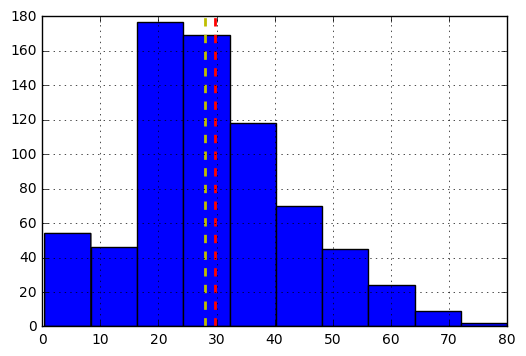

In [7]:
# Let us see how the data is distributed using a histogram
# we will use the axvline function to plot the mean and median as vertical lines over our histogram


avg_plot = titanic["Age"].hist()
avg_plot.axvline(titanic["Age"].mean(), color='r', linestyle='dashed', linewidth=2)
avg_plot.axvline(titanic["Age"].median(), color='y', linestyle='dashed', linewidth=2)

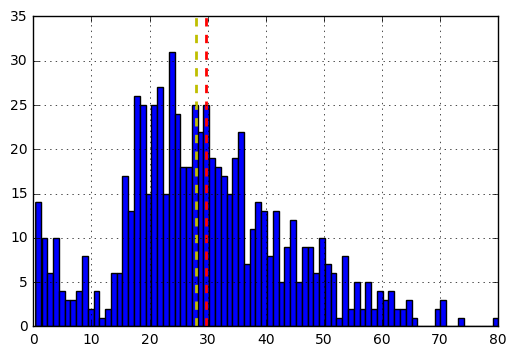

In [8]:
# Above plot doesn't really give us the picture of the entire distribution, just the distribution of ranges.
# Let's plot a histogram and represent every single value
# The 'bins' argument to hist tells it how many bins to plot. 
# Here we plot as many bins as the max Age in the data, so we can cover the entire dataset
# http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.hist.html

avg_plot_detailed = titanic["Age"].hist(bins=int(titanic["Age"].max()))
avg_plot_detailed.axvline(titanic["Age"].mean(), color='r', linestyle='dashed', linewidth=2)
avg_plot_detailed.axvline(titanic["Age"].median(), color='y', linestyle='dashed', linewidth=2)

## Data Cleaning

In [9]:
#Let us check how many values are empty
print titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
#replace all null age values with median

titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())


In [11]:
#Sex of a person might be a valuable feature. We give it unique values male = 0, female = 1

#choose rows which have value 'male' in the 'Sex' column and assign 0
titanic.loc[titanic["Sex"]=="male","Sex"] = 0

#now for women
titanic.loc[titanic["Sex"]=="female","Sex"] = 1


In [12]:
# just like how iloc takes an array of integer indices, loc takes an array of booleans 
# which specify if vale at given index has to be included or not

titanic["Sex"]==0



0       True
1      False
2      False
3      False
4       True
5       True
6       True
7       True
8      False
9      False
10     False
11     False
12      True
13      True
14     False
15     False
16      True
17      True
18     False
19     False
20      True
21      True
22     False
23      True
24     False
25     False
26      True
27      True
28     False
29      True
       ...  
861     True
862    False
863    False
864     True
865    False
866    False
867     True
868     True
869     True
870     True
871    False
872     True
873     True
874    False
875    False
876     True
877     True
878     True
879    False
880    False
881     True
882    False
883     True
884     True
885    False
886     True
887    False
888    False
889     True
890     True
Name: Sex, dtype: bool

In [13]:
# Where the passenger embarked might also be valuable information
# Let us check if data is refined and complete

print titanic["Embarked"].unique()

print "Nan", titanic["Embarked"].isnull().sum()

for i in titanic["Embarked"].unique()[:-1]:
    print i, sum(titanic["Embarked"]==i)

['S' 'C' 'Q' nan]
Nan 2
S 644
C 168
Q 77


In [14]:
titanic["Embarked"]= titanic["Embarked"].fillna('S')

# Assign integer values to these
# First argumnent to loc -> Rows in 'Embarked' column that are S,Q,C resp, we use boolean arrays here
# Second arguenmt to loc -> the 'Embarked' Column

titanic.loc[titanic["Embarked"]=='S',"Embarked"] = 0
titanic.loc[titanic["Embarked"]=='C',"Embarked"] = 1
titanic.loc[titanic["Embarked"]=='Q',"Embarked"] = 2

## Linear Regression with cross validation

In [15]:
#Choosing our features
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

#import the linear regression and cross validation helper functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


In [16]:
#initialize the Linear Regression object
alg = LinearRegression()

# We divide the data into three samples and combine two at a time for training and use the 3rd for testing.
# KFold takes care of this

kf = KFold(n_splits=3, random_state=1)

predictions =[]

for train,test in kf.split(titanic[predictors]):
    #Here train, test are a np array of indices, so we can use iloc to parse the dataframe accordingly
    print 'Train: ',train[0],'-',train[-1],'    Test: ',test[0],'-',test[-1],"\n"

# The second train set is actually 0-297,593-890 if we observe the trend    
# Concatenating the three test batches gives us the entire column prediction

Train:  297 - 890     Test:  0 - 296 

Train:  0 - 890     Test:  297 - 593 

Train:  0 - 593     Test:  594 - 890 



In [17]:
#fit the model and cross validate

for train,test in kf.split(titanic):
    #Here train, test are a np array of indices, so we can use iloc to parse the dataframe accordingly
    train_data = (titanic[predictors].iloc[train,:])
    train_target = titanic["Survived"].iloc[train]
    
    alg.fit(train_data,train_target)
    
    test_pred = alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_pred)

In [18]:
# Now let's check out predictions
import numpy as np

#Concatenate the predictions from the three datasets
predictions = np.concatenate(predictions, axis = 0)

predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

right_pred = predictions == titanic["Survived"]

accuracy = float(sum(right_pred))/len(right_pred)

print accuracy

0.783389450056


## Logistic Regression

In [19]:
# Now Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

# Initialize our algorithm
algreg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
#This here is all the above steps condesed!
scores = model_selection.cross_val_score(algreg, titanic[predictors], titanic["Survived"], cv=3)
# Take the mean of the scores (because we have one for each fold)

print(scores.mean())



0.787878787879


In [20]:
# Now prepare the test set for submission

titanic_test = pandas.read_csv("test.csv")
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test.loc[titanic_test["Sex"]=="male","Sex"] = 0
titanic_test.loc[titanic_test["Sex"]=="female","Sex"] = 1

titanic_test["Embarked"] = titanic_test["Embarked"].fillna('S')


titanic_test.loc[titanic_test["Embarked"]=="S","Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"]=="C","Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"]=="Q","Embarked"] = 2


titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())

In [21]:
# Train the algorithm using all the training data (LinReg)
alg.fit(titanic[predictors], titanic["Survived"])
algreg.fit(titanic[predictors], titanic["Survived"])

# Make predictions using the test set.
LinRegpredictions = alg.predict(titanic_test[predictors])
LogRegpredictions = algreg.predict(titanic_test[predictors])

LinRegpredictions[LinRegpredictions > 0.5] = 1
LinRegpredictions[LinRegpredictions <= 0.5] = 0

# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission_LinReg = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": LinRegpredictions
    })

submission_LogReg = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": LogRegpredictions
    })

submission_LinReg.to_csv("kaggle_submission1_LinReg.csv", index=False)
submission_LogReg.to_csv("kaggle_submission2_LogReg.csv", index=False)


In [22]:
# Random cool stuff

from IPython.display import Image

Image(url='http://ipython.org/_static/IPy_header.png')


In [23]:
from IPython.display import HTML
HTML("""<table>
        <tr> 
          <td>1</td>
          <td>2</td>
        </tr>
        <tr> 
          <td>3</td>
          <td>4</td>
        </tr>        
        </table>""")


1,2
3,4


In [24]:
titanic["Age"].max()

80.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9de202e1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9de1c4ed50>]], dtype=object)

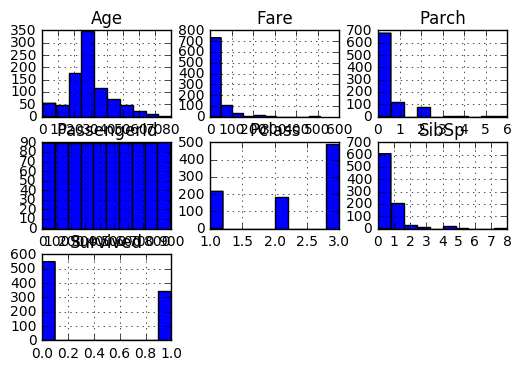

In [25]:
titanic.hist()

# Improving Submission (Dataquest Tutorial 2)

## Random Forests

In [26]:
# Import the random Forest Classifier from sklearn
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [27]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
kf = cross_validation.KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.785634118967


/home/kaushiksk/miniconda2/envs/ml/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)

scores = model_selection.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.801346801347


In [147]:
### Optimized Random Forest
# http://scikit-learn.org/stable/modules/ensemble.html#parameters

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)

scores = model_selection.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.832772166105 ['Pclass', 'Sex', 'Fare', 'FamilySize', 'Title', 'Age', 'Embarked']


### Generate New Features

In [30]:
# Generating a familysize column
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

# The .apply method generates a new series
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

# .apply apllies the supplied function on each row of the associated series

In [31]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pandas.value_counts(titles))


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64


In [32]:

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, 
                 "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print(pandas.value_counts(titles))

# Add in the title column.
titanic["Title"] = titles


1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [33]:
import operator

# A dictionary mapping family name to id
family_id_mapping = {}

# A function to get the id given a row
def get_family_id(row):
    # Find the last name by splitting on a comma
    last_name = row["Name"].split(",")[0]
    # Create the family id
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    # Look up the id in the mapping
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            # Get the maximum id from the mapping and add one to it if we don't have an id
            current_id = max(family_id_mapping.values()) + 1
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

# Get the family ids with the apply method
family_ids = titanic.apply(get_family_id, axis=1)


In [34]:

# There are a lot of family ids, so we'll compress all of the families under 3 members into one code.
family_ids[titanic["FamilySize"] < 3] = -1

# Print the count of each unique id.
print(pandas.value_counts(family_ids))

titanic["FamilyId"] = family_ids


-1      800
 14       8
 149      7
 63       6
 50       6
 59       6
 17       5
 384      4
 27       4
 25       4
 162      4
 8        4
 84       4
 340      4
 43       3
 269      3
 58       3
 633      2
 167      2
 280      2
 510      2
 90       2
 83       1
 625      1
 376      1
 449      1
 498      1
 588      1
dtype: int64


In [35]:
pandas.value_counts(titanic["Ticket"])

CA. 2343             7
347082               7
1601                 7
347088               6
CA 2144              6
3101295              6
382652               5
S.O.C. 14879         5
PC 17757             4
4133                 4
LINE                 4
349909               4
347077               4
W./C. 6608           4
113760               4
2666                 4
113781               4
19950                4
17421                4
347742               3
239853               3
110152               3
24160                3
13502                3
PC 17572             3
C.A. 34651           3
248727               3
35273                3
F.C.C. 13529         3
PC 17755             3
                    ..
330877               1
315094               1
236852               1
4137                 1
4136                 1
226593               1
4134                 1
374746               1
110813               1
C.A. 6212            1
349219               1
34218                1
343120     

In [36]:
titanic[titanic["Ticket"]=='1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength,Title,FamilyId
74,75,1,3,"Bing, Mr. Lee",0,32.0,0,0,1601,56.4958,NaN,0,0,13,1,-1
169,170,0,3,"Ling, Mr. Lee",0,28.0,0,0,1601,56.4958,NaN,0,0,13,1,-1
509,510,1,3,"Lang, Mr. Fang",0,26.0,0,0,1601,56.4958,NaN,0,0,14,1,-1
643,644,1,3,"Foo, Mr. Choong",0,28.0,0,0,1601,56.4958,NaN,0,0,15,1,-1
692,693,1,3,"Lam, Mr. Ali",0,28.0,0,0,1601,56.4958,NaN,0,0,12,1,-1
826,827,0,3,"Lam, Mr. Len",0,28.0,0,0,1601,56.4958,NaN,0,0,12,1,-1
838,839,1,3,"Chip, Mr. Chang",0,32.0,0,0,1601,56.4958,NaN,0,0,15,1,-1


## Feature Engineering
We have the features, now select the best one's

### SlectKBest

In [37]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

In [38]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "FamilyId", "NameLength"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)


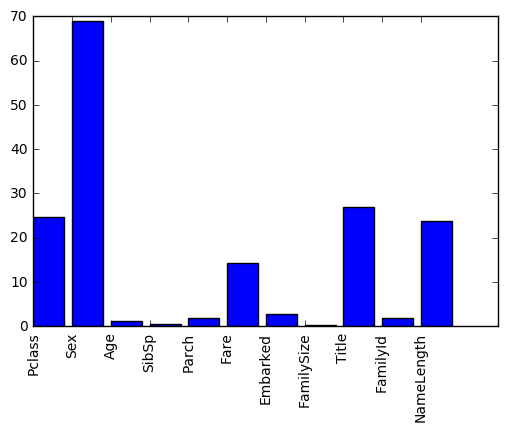

In [39]:
# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()


In [40]:
# Pick only the four best features.
predictors = ["Pclass", "Sex", "Fare", "Title"]

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.817059483726


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

# Initialize the cross validation folds
kf = KFold(n_splits=3, random_state=1)

predictions = []
for train, test in kf.split(titanic):
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0]*3 + full_test_predictions[1]) / 4
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)


0.822671156004


/home/kaushiksk/.local/lib/python2.7/site-packages/ipykernel/__main__.py:37: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [42]:
from sklearn import svm

predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked","Title"]
clf = svm.SVC(kernel="linear",random_state=1)
#clf.fit(titanic[predictors], titanic["Survived"]) 
scores = cross_validation.cross_val_score(clf, titanic[predictors], titanic["Survived"], cv=3)
print scores.mean()

0.786756453423


In [43]:
from sklearn.decomposition import PCA

predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]
pca = PCA(n_components=2)
fit = pca.fit(titanic[predictors])
Xn = pca.fit_transform(titanic[predictors])
print Xn

[[ -1.91281742e+01  -2.22571798e+01]
 [ -8.49745521e+00   4.13908930e+01]
 [ -1.90911707e+01  -2.14519180e+01]
 ..., 
 [  6.08144179e+02  -1.13681106e+02]
 [ -1.53325117e+01   3.03653846e-01]
 [ -1.92318293e+01  -2.14158496e+01]]


Here
One fit
Mesh created
Done pre


TypeError: xlabel() takes at least 1 argument (0 given)

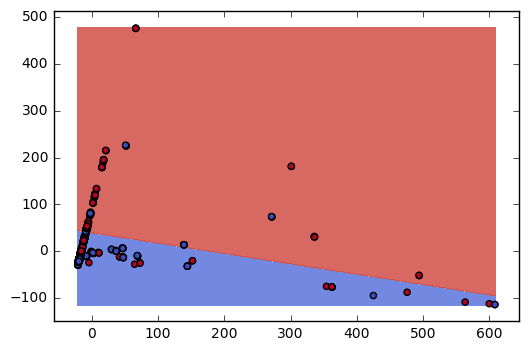

In [59]:

from sklearn import svm

# import some data to play with

X = Xn  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = titanic["Survived"]

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
print "Here"
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
print "One fit"
#rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
#poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
#lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))
print "Mesh created"
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate([svc]):#, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    #plt.subplot(2, 2, i + 1)
    #plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print "Done pre"
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    #plt.xlim(xx.min(), xx.max())
    #plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    #plt.title(titles[i])
    print "plot", i 

plt.show()

In [52]:
enumerate([2])

In [57]:
from sklearn import svm

predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked","Title"]
clf = svm.SVC(kernel="linear",random_state=1)
#clf.fit(titanic[predictors], titanic["Survived"]) 
scores = cross_validation.cross_val_score(clf, Xn, titanic["Survived"], cv=3)
print scores.mean()

0.661054994388


In [71]:
from sklearn.decomposition import PCA

predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]
pca = PCA(n_components=3)
fit = pca.fit(titanic[predictors])
Xn = pca.fit_transform(titanic[predictors])
print Xn

[[ -1.91281742e+01  -2.22571798e+01  -6.93749566e+00]
 [ -8.49745521e+00   4.13908930e+01   7.04692431e+00]
 [ -1.90911707e+01  -2.14519180e+01  -2.94330761e+00]
 ..., 
 [  6.08144179e+02  -1.13681106e+02   1.35368652e+01]
 [ -1.53325117e+01   3.03653846e-01  -3.59667966e+00]
 [ -1.92318293e+01  -2.14158496e+01   3.05882809e+00]]


Here
One fit
Mesh created
plot 0


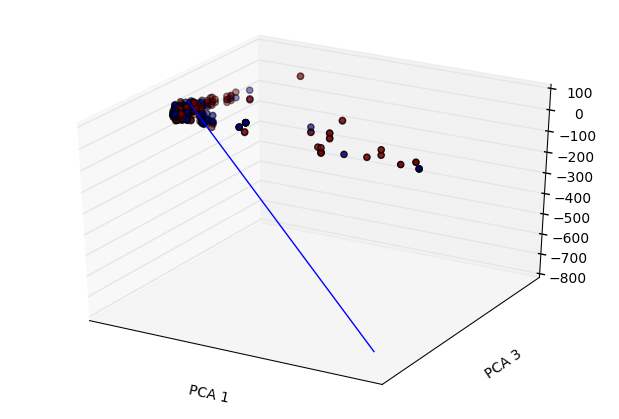

In [98]:

from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D

# import some data to play with

X = Xn # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = titanic["Survived"]

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter

svc = svm.SVC(kernel='linear', C=C).fit(X, y)

#rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
#poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
#lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

fig = plt.figure()
ax = Axes3D(fig)
for i, clf in enumerate([svc]):#, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    #plt.subplot(2, 2, i + 1)
    #plt.subplots_adjust(wspace=0.4, hspace=0.4)
    

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1],X[:,2],c=y,zdir='z')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.ylabel('PCA 3')
    #plt.xlim(xx.min(), xx.max())
    #plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    #plt.zticks(())
    
    w = clf.coef_[0]
    a = -w[0] / w[2]
    b = -w[1] / w[2]
    xx = np.linspace(x_min,x_max)
    yy = (w[0]/w[2]) * xx - (clf.intercept_[0]) / w[1]
    zz = a * xx  + b*yy - (clf.intercept_[0]) / w[2]

    ax.plot(xx, yy, zz,zdir='z')
        #plt.title(titles[i])
    print "plot", i 



In [87]:
Xn[:,0]

array([ -1.91281742e+01,  -8.49745521e+00,  -1.90911707e+01,
        -1.15412891e+01,  -1.92330612e+01,  -1.90400791e+01,
        -1.21052205e+01,  -7.51442535e+00,  -1.85400364e+01,
        -1.50926241e+01,  -1.71850384e+01,  -1.64852089e+01,
        -1.89664850e+01,  -5.09290120e-01,  -1.88899709e+01,
        -1.82279644e+01,   2.73260494e+00,  -1.82645089e+01,
        -1.74514779e+01,  -1.92443779e+01,  -1.61742809e+01,
        -1.83711394e+01,  -1.88789069e+01,  -1.44306080e+01,
        -7.62403832e+00,   1.03697937e+01,  -1.92496911e+01,
         5.21207317e+01,  -1.91354931e+01,  -1.91349279e+01,
        -1.59530007e+01,   4.49743504e+00,  -1.91575031e+01,
        -1.93657258e+01,  -6.47029803e+00,  -1.18583963e+01,
        -1.92489756e+01,  -1.89842567e+01,  -1.72123799e+01,
        -1.83032385e+01,  -1.90637100e+01,  -1.68684354e+01,
        -1.91354161e+01,   3.04289320e+01,  -1.89755473e+01,
        -1.91086590e+01,  -1.78303428e+01,  -1.91575031e+01,
        -1.67670504e+01,

In [68]:
Xn.shape

(891, 2)

## Neural Network

In [100]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [127]:
# create model
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]
model = Sequential()
model.add(Dense(14, input_dim=len(predictors), init='uniform', activation='relu'))
#model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

In [128]:

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
# Fit the model
X = titanic[predictors].values
Y = titanic["Survived"].values
model.fit(X, Y, nb_epoch=150, batch_size=10,verbose=0)


In [140]:

scores = model.evaluate(X, Y,verbose=0)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 83.50%


## Test Time !

In [131]:
# First, we'll add titles to the test set.
titles = titanic_test["Name"].apply(get_title)
# We're adding the Dona title to the mapping, because it's in the test set, but not the training set
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}
for k,v in title_mapping.items():
    titles[titles == k] = v
titanic_test["Title"] = titles
# Check the counts of each unique title.
print(pandas.value_counts(titanic_test["Title"]))

# Now, we add the family size column.
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]

# Now we can add family ids.
# We'll use the same ids that we did earlier.


family_ids = titanic_test.apply(get_family_id, axis=1)
family_ids[titanic_test["FamilySize"] < 3] = -1
titanic_test["FamilyId"] = family_ids
titanic_test["NameLength"] = titanic_test["Name"].apply(lambda x: len(x))

1     240
2      79
3      72
4      21
7       2
6       2
10      1
5       1
Name: Title, dtype: int64


### Ensemble 

In [155]:
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(titanic[predictors], titanic["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

# The gradient boosting classifier generates better predictions, so we weight it higher.
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

submission.to_csv("kaggle_submission3_ensemble.csv", index=False)

## Random Forest 

In [156]:

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
alg.fit(titanic[predictors], titanic["Survived"])
predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv("kaggle_submission4_RF.csv", index=False)

### Neural Network

In [157]:
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]
predictions = model.predict(titanic_test[predictors].values.astype(float))
predictions = [round(x) for x in predictions]
predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = np.array(predictions).astype(int)
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv("kaggle_submission5_NN.csv", index=False)